GOAL: INVESTIGATE VELOCITY GRADIENTS AND WHETHER THEY OCCUR NEAR THE INFRARED EXCESS

In [1]:
import astropy
import numpy as np
import pandas as pd
import matplotlib
import scipy

from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.color'] = 'Black'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = (9, 6)

In [22]:
rt = '/Users/FRANNYPACK/Downloads/grind!/DRAO/Data/HI_CUBES/' # root for files

In [7]:
# make 3D FITS header for RGB cube

def get_hdr(file):
    cur_hdr = file[0].header
    
    new_hdr = fits.Header()
    new_hdr["NAXIS   "] = cur_hdr["NAXIS  "]
    new_hdr["NAXIS1  "] = cur_hdr["NAXIS1  "]
    new_hdr["NAXIS2  "] = cur_hdr["NAXIS2  "]
    new_hdr["NAXIS3  "] = 3 # for R, G, B
    
    new_hdr["CRPIX1  "] = cur_hdr["CRPIX1  "]
    new_hdr["CRPIX2  "] = cur_hdr["CRPIX2  "]
    new_hdr["CRPIX3  "] = cur_hdr["CRPIX3  "]
    
    new_hdr["CRVAL1  "] = cur_hdr["CRVAL1  "]
    new_hdr["CRVAL2  "] = cur_hdr["CRVAL2  "]
    new_hdr["CRVAL3  "] = cur_hdr["CRVAL3  "]
    
    new_hdr["CDELT1  "] = cur_hdr["CDELT1  "]
    new_hdr["CDELT2  "] = cur_hdr["CDELT2  "]
    new_hdr["CDELT3  "] = cur_hdr["CDELT3  "]
    
    new_hdr["CTYPE1  "] = cur_hdr["CTYPE1  "]
    new_hdr["CTYPE2  "] = cur_hdr["CTYPE2  "]
    new_hdr["CTYPE3  "] = cur_hdr["CTYPE3  "]
    
    new_hdr["LONPOLE "] = cur_hdr["LONPOLE "]
    new_hdr["LATPOLE "] = cur_hdr["LATPOLE "]
    
    return new_hdr

In [50]:
def bin_v(file, indx_start, indx_end):
    data = np.sum(file[0].data[indx_start:indx_end,:,:], axis = 0)
    norm = np.linalg.norm(data)
    data = (data / norm) * 99
    return data

In [76]:
# creates new cube with 3 binned velocity channels (for RGB color maps)
def RGB_cube(file, indx_start, indx_end, name):
    
    indx1 = indx_start
    indx2 = int(((indx_end - indx_start) / 3) + indx_start)
    indx3 = int((2 * (indx_end - indx_start) / 3) + indx_start)
    indx4 = indx_end
    RGB_hdr = get_hdr(file)
    RGB_data = np.zeros((file[0].header['NAXIS1'], file[0].header['NAXIS2'], 3))
    
    RGB_data[:,:,0] = bin_v(file, indx1, indx2)
    RGB_data[:,:,1] = bin_v(file, indx2, indx3)
    RGB_data[:,:,2] = bin_v(file, indx3, indx4)
    
    fits.writeto(rt + '/RGB/' + name + '_RGB.fits', RGB_data, header = RGB_hdr, overwrite = True)

In [12]:
# gets index of specific cube velocity for FILE1
def get_indx(v):
    return int(np.abs((v - (4.551 * 10 ** 4)) / (8.3 * 10 ** 2)))

In [80]:
file1[0].header

SIMPLE  =                    T / Written by IDL:  Thu Dec 20 11:03:12 2012      
BITPIX  =                  -32                                                  
NAXIS   =                    3                                                  
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
NAXIS3  =                  256 /                                                
CTYPE1  = 'GLON-SFL'           /                                                
CRVAL1  =  1.4398001000000E+02                                                  
CRPIX1  =  5.1300000000000E+02                                                  
CDELT1  = -4.9999990441285E-03                                                  
CTYPE2  = 'GLAT-SFL'           /                                                
CRVAL2  =  0.0000000000000E+00                                                  
CRPIX2  =       -5091.002720

In [77]:
file1 = fits.open(rt + '1H0717.fits') 
file1[0].data[np.where(file1[0].data == -32768)] = 0 # thresholding data
RGB_cube(file1, get_indx(3.47 * 10 ** 3), get_indx(-3.949 * 10 ** 3), '1H0717') # RGB cube for FILE1
file1_RGB = fits.open(rt + '/RGB/1H0717_RGB.fits')

3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


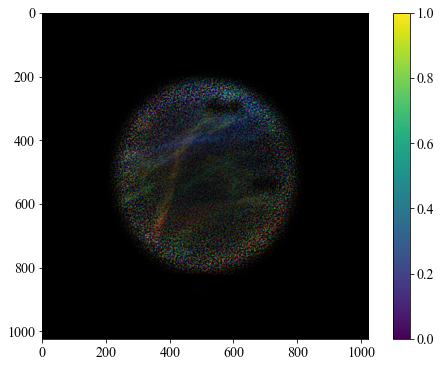

In [75]:
plt.imshow(file1_RGB[0].data)
plt.colorbar()

In [6]:
file2 = fits.open(rt + 'HS0624_FINAL_GLS.fits')